In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skewtest
from scipy.stats import kurtosistest
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

print ("Libraries sucessfully loaded") 

Libraries sucessfully loaded


In [2]:
# loading dataset_case file, hosted in Github repository for easy compatibility of this notebook when shared 
filename_exp = "https://raw.githubusercontent.com/tiagottmoraes/STL_test/main/Datasets/Dataset_case_CLEAN.csv"

In [3]:
df=pd.read_csv(filename_exp)

In [4]:
df=df.drop(['Unnamed: 0'], axis = 1)

# EDA

## The following EDA was carried out using 3 distinct analysis:
- A. Correlation Test
- B. Skewness Test
- C. Variance Test



### A. Correlation Test

In [5]:
df.corr()['tch_bloco'].sort_values(ascending=False)

tch_bloco        1.000000
NDVI_1Q          0.543077
NDVI_2Q          0.294158
NDVI_4Q          0.247179
safra            0.030871
id_bloco        -0.000252
NDVI_3Q         -0.022711
area_bloco      -0.053810
quant_talhoes   -0.080458
mes_colheita    -0.318487
Name: tch_bloco, dtype: float64

<AxesSubplot:>

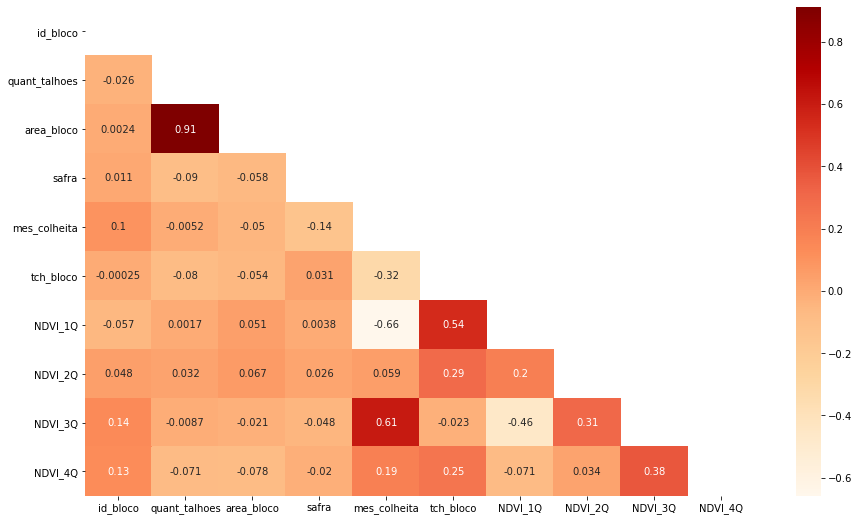

In [6]:
plt.figure(figsize = (15,9))
mask=np.triu(df.corr())
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='OrRd')

### B. Uniformity Test (distribuition uniformity) - Skewness and Kurtosis

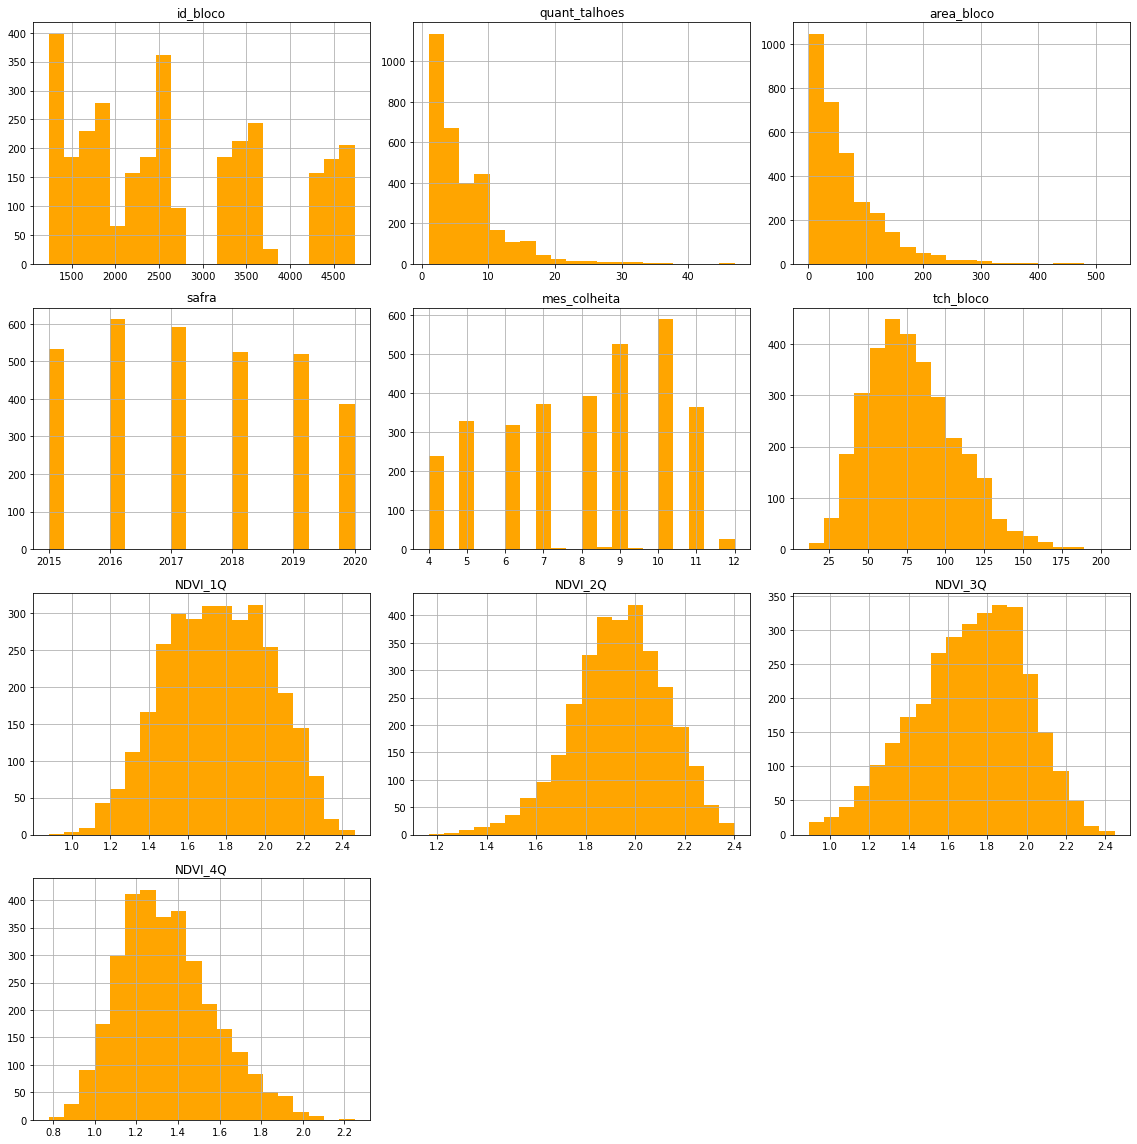

In [7]:
df.hist(bins=20, color='orange', figsize=(16,16))
plt.tight_layout()

In [8]:
print (stats.skewtest(df['NDVI_1Q'],axis=0))
print (stats.kurtosistest(df['NDVI_1Q'], axis=0, nan_policy='propagate'))

SkewtestResult(statistic=-1.731159778994065, pvalue=0.08342327081131114)
KurtosistestResult(statistic=-11.219450510875902, pvalue=3.2729775595816995e-29)


In [9]:
print (stats.skewtest(df['NDVI_2Q'],axis=0))
print (stats.kurtosistest(df['NDVI_2Q'], axis=0, nan_policy='propagate'))

SkewtestResult(statistic=-7.966341913475098, pvalue=1.6344033723171155e-15)
KurtosistestResult(statistic=1.969775400987119, pvalue=0.04886411700454631)


In [10]:
print (stats.skewtest(df['NDVI_3Q'],axis=0))
print (stats.kurtosistest(df['NDVI_3Q'], axis=0, nan_policy='propagate'))

SkewtestResult(statistic=-7.870134483420954, pvalue=3.542602279976638e-15)
KurtosistestResult(statistic=-4.213762456506823, pvalue=2.5115143052854924e-05)


In [11]:
print (stats.skewtest(df['NDVI_4Q'],axis=0))
print (stats.kurtosistest(df['NDVI_4Q'], axis=0, nan_policy='propagate'))

SkewtestResult(statistic=11.043329970495286, pvalue=2.3611720655502055e-28)
KurtosistestResult(statistic=0.0685208370255149, pvalue=0.9453710335083129)


### C. Variance Test

Pearson, P-Valor =  (-0.053809582585254485, 0.002452080286892261)


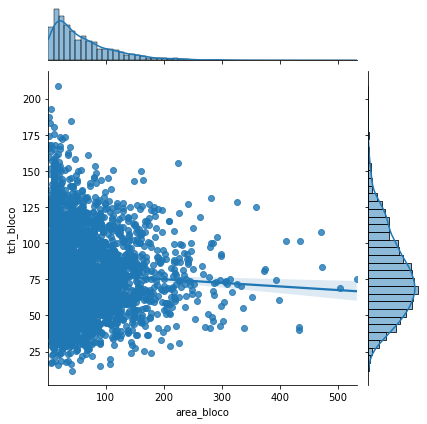

In [12]:
sns.jointplot(data=df, x="area_bloco", y="tch_bloco", kind="reg")
stats.pearsonr(df['area_bloco'],df['tch_bloco'])
print ('Pearson, P-Valor = ', stats.pearsonr(df['area_bloco'],df['tch_bloco']))


C:\Users\tiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


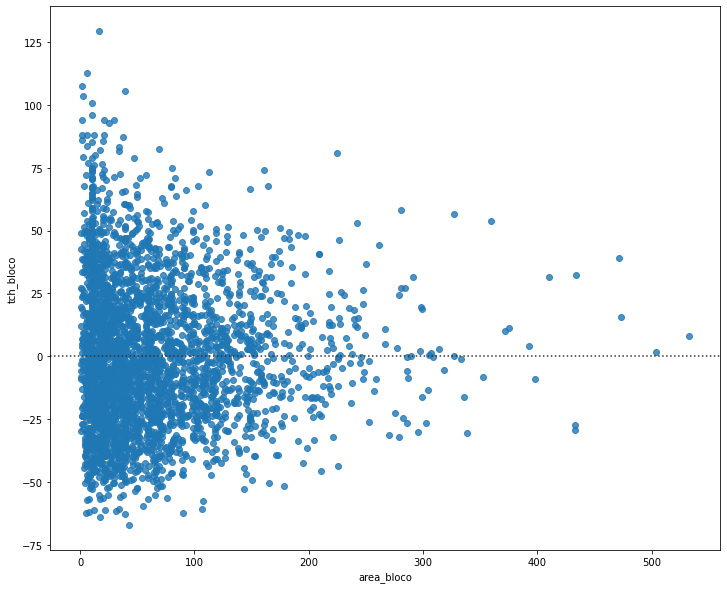

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['area_bloco'], df['tch_bloco'])
plt.show()

Pearson, P-Valor =  (0.5430771752232849, 1.742998272394298e-242)


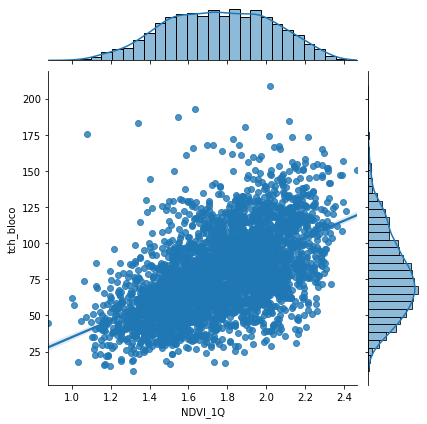

In [ ]:
sns.jointplot(data=df, x="NDVI_1Q", y="tch_bloco", kind="reg")
stats.pearsonr(df['NDVI_1Q'],df['tch_bloco'])
print ('Pearson, P-Valor = ', stats.pearsonr(df['NDVI_1Q'],df['tch_bloco']))

C:\Users\tiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


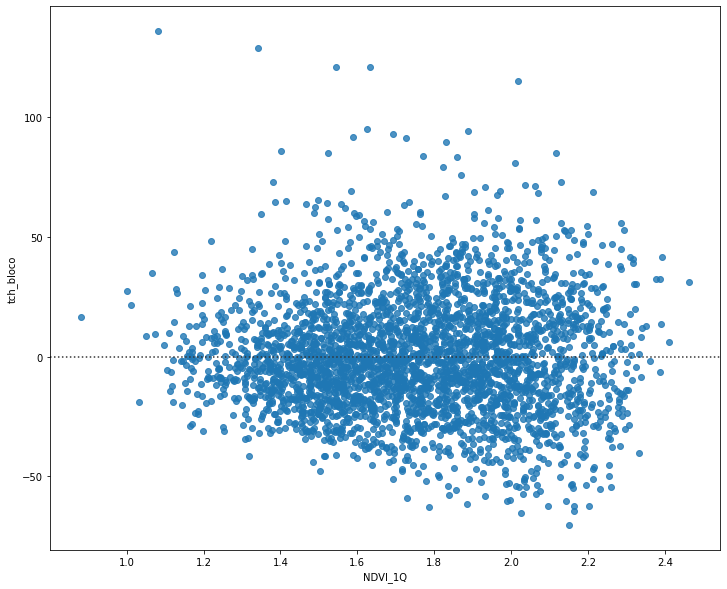

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['NDVI_1Q'], df['tch_bloco'])
plt.show()


Pearson, P-Valor =  (0.29415756608965443, 3.0297943031280924e-64)


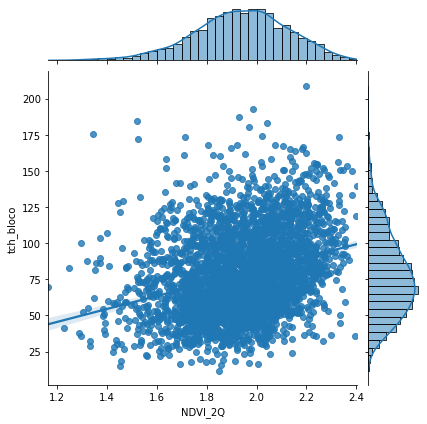

In [ ]:
sns.jointplot(data=df, x="NDVI_2Q", y="tch_bloco", kind="reg")
stats.pearsonr(df['NDVI_2Q'],df['tch_bloco'])
print ('Pearson, P-Valor = ', stats.pearsonr(df['NDVI_2Q'],df['tch_bloco']))

C:\Users\tiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


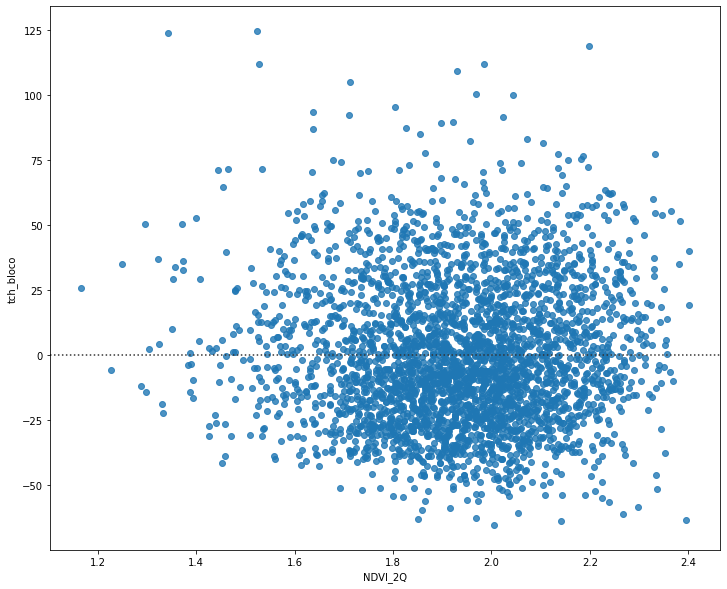

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['NDVI_2Q'], df['tch_bloco'])
plt.show()

Pearson, P-Valor =  (-0.02271096335684071, 0.20133942172764993)


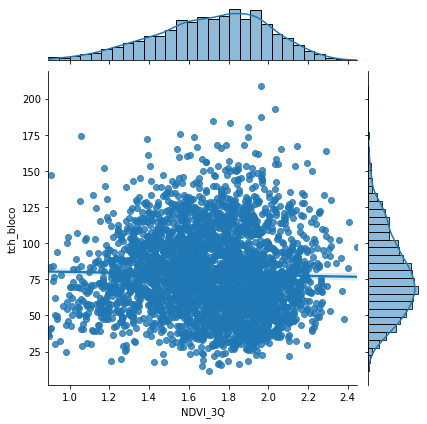

In [ ]:
sns.jointplot(data=df, x="NDVI_3Q", y="tch_bloco", kind="reg")
stats.pearsonr(df['NDVI_3Q'],df['tch_bloco'])
print ('Pearson, P-Valor = ', stats.pearsonr(df['NDVI_3Q'],df['tch_bloco']))

C:\Users\tiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


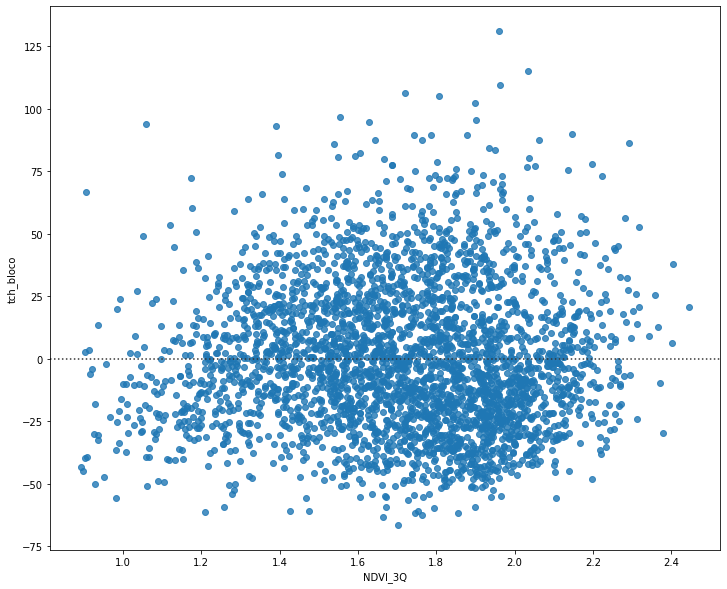

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['NDVI_3Q'], df['tch_bloco'])
plt.show()

Pearson, P-Valor =  (0.24717930500379962, 2.6821237348657305e-45)


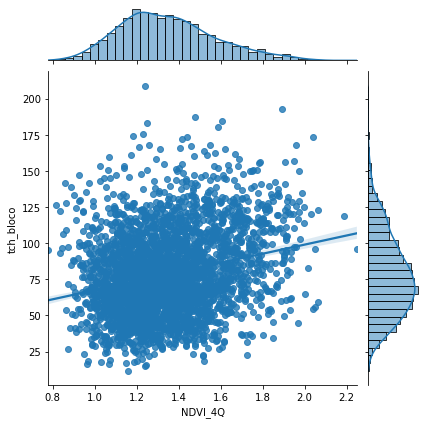

In [ ]:
sns.jointplot(data=df, x="NDVI_4Q", y="tch_bloco", kind="reg")
stats.pearsonr(df['NDVI_4Q'],df['tch_bloco'])
print ('Pearson, P-Valor = ', stats.pearsonr(df['NDVI_4Q'],df['tch_bloco']))

C:\Users\tiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


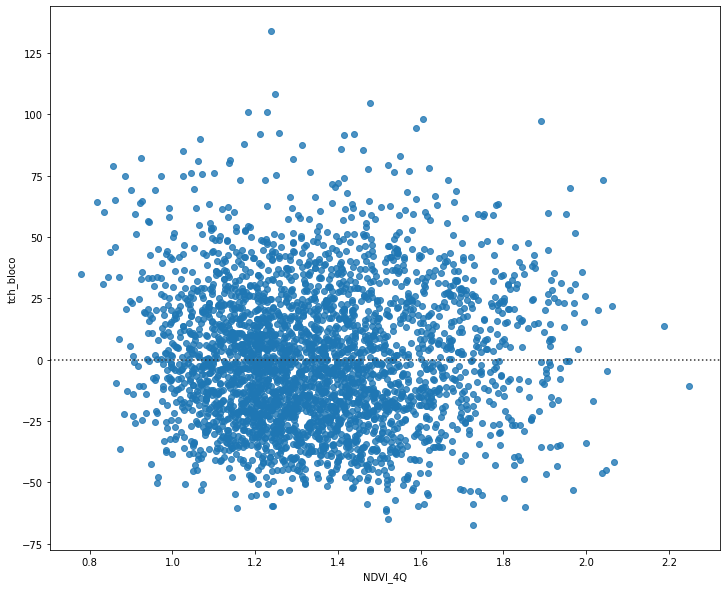

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['NDVI_4Q'], df['tch_bloco'])
plt.show()

### EDA conclusions

- tch_bloco has a strong positive correlation to NDVI_1Q data, average positive correlation to NDVI_2Q and NDVI_4Q data and a weak correlation to NDVI_3Q data
- NDVI_1Q is the least distrubuted data from the whole dataset. 
- Variance is rather consistent along all NDVI features. The only exception is the NDVI_3Q, that showed a more spread distribuiton in comparisson to the rest.


- When building linear models that demands only one independent variable, it´s reccomended to pick the NDVI_1Q, as it showed the best correlation to the dependent variable (tch_bloco) and a tolerable skewness and variance.

## 2. Model building
For this section, we'll build several different regression models and test their performance (accuracy and MSE wise). In the end, we compare the performance scores from each model against each other to define which one is the best to predict the tch_bloco label 

- A. Linear Regression
- B. Multivariate Linear Regression
- C. Polynomial Regression
- D. Support Vector Regression (SVR)
- E. Deep Neural NEtwork (DNN)


### A. Linear Regression

In [ ]:
XLR=df[['NDVI_1Q']].values
yLR=df['tch_bloco']
XLR.shape, yLR.shape

((3167, 1), (3167,))

In [ ]:
from sklearn.model_selection import train_test_split
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(XLR, yLR, test_size = 0.2, random_state = 0)
X_trainLR.shape, y_testLR.shape, X_testLR.shape, y_trainLR.shape

((2533, 1), (634,), (634, 1), (2533,))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_trainLR, y_trainLR)

LinearRegression()

In [ ]:
regressor.intercept_

-23.37498247990338

In [ ]:
regressor.coef_

array([58.03773763])

In [ ]:
accuracy = regressor.score(X_testLR, y_testLR)
print('The R-square is: = ', regressor.score(X_testLR, y_testLR))

The R-square is: =  0.30517070032433957


In [ ]:
from sklearn.metrics import mean_squared_error
yhatLR = regressor.predict(X_testLR)
mseLR = mean_squared_error(y_testLR,yhatLR,squared=False)
print('The Mean squared error of the tch_bloco variable is: ', mseLR)

The Mean squared error of the tch_bloco variable is:  23.7814225321218


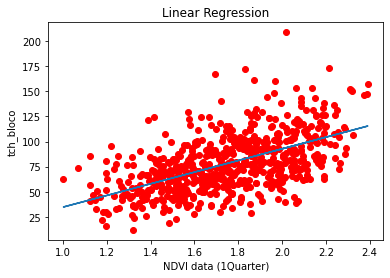

In [ ]:
plt.plot(X_testLR,y_testLR, 'ro')
plt.plot(X_testLR, yhatLR)
plt.xlabel('NDVI data (1Quarter)')
plt.ylabel('tch_bloco')
plt.title('Linear Regression')
plt.show()

### B. Multivariate Linear Regression

In [ ]:
X_MLR=df[['NDVI_1Q','NDVI_2Q','NDVI_3Q', 'NDVI_4Q']].values
y_MLR=df['tch_bloco']
X_MLR.shape, y_MLR.shape

((3167, 4), (3167,))

In [ ]:
X_train_MLR, X_test_MLR, y_train_MLR, y_test_MLR = train_test_split(X_MLR, y_MLR, test_size = 0.2, random_state = 0)
X_train_MLR.shape, y_test_MLR.shape, X_test_MLR.shape, y_train_MLR.shape

((2533, 4), (634,), (634, 4), (2533,))

In [ ]:
MLR=LinearRegression()
MLR.fit(X_train_MLR, y_train_MLR)


LinearRegression()

In [ ]:
MLR.intercept_

-135.25498907504965

In [ ]:
MLR.coef_

array([62.32078531, 22.45709954, 11.45379485, 30.57072623])

In [ ]:
accuracy = MLR.score(X_test_MLR, y_test_MLR)
print('The R-square is: = ', MLR.score(X_test_MLR, y_test_MLR))

The R-square is: =  0.41092738260302897


In [ ]:
yhat_MLR = MLR.predict(X_test_MLR)
mse_MLR = mean_squared_error(y_test_MLR,yhat_MLR,squared=False)
print('The Mean squared error of the tch_bloco variable is: ', mse_MLR)

The Mean squared error of the tch_bloco variable is:  21.8969277362522


C:\Users\tiago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tiago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


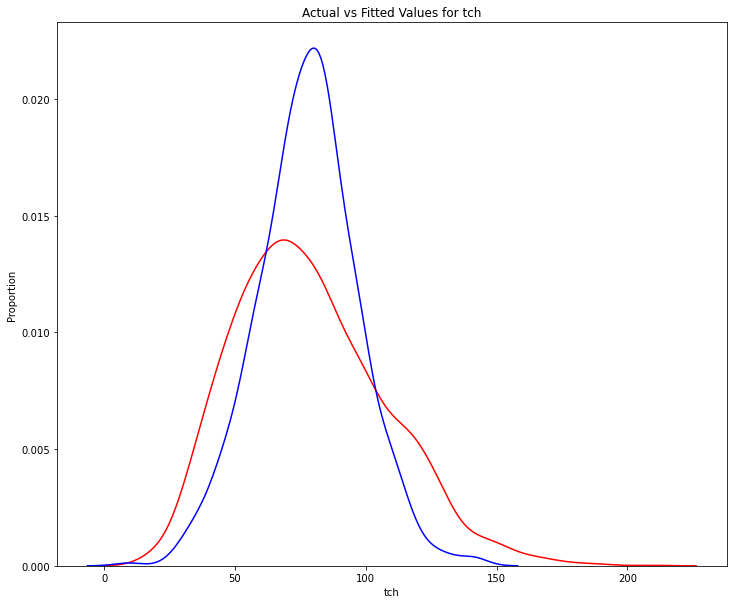

In [ ]:
plt.figure(figsize=(width, height))

ax1=sns.distplot(df['tch_bloco'], hist=False, color='r',label='Actual Value')
sns.distplot(yhat_MLR, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title("Actual vs Fitted Values for tch")
plt.xlabel('tch')
plt.ylabel('Proportion')

plt.show()
plt.close()

### C. Polynomial

In [ ]:
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(2.5,0.7,3)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new,y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for tch ~ NDVI')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('tch_bloco')

    plt.show()
    plt.close()

In [ ]:
X_Poly=df['NDVI_1Q']
y_Poly=df['tch_bloco']

In [ ]:
f= np.polyfit(X_Poly,y_Poly,5) #5th order polynomial
p = np.poly1d(f)
print(p)


       5        4        3        2
138.3 x - 1056 x + 3094 x - 4299 x + 2833 x - 660.7


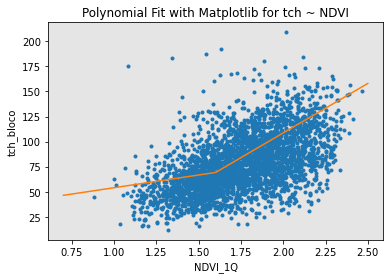

In [ ]:
PlotPolly(p,X_Poly,y_Poly,'NDVI_1Q')

In [ ]:
np.polyfit(X_Poly,y_Poly,5)

array([  138.26341612, -1055.60437229,  3093.68768532, -4299.09596256,
        2832.5996978 ,  -660.73235164])

In [ ]:
r_squared = r2_score(y_Poly, p(X_Poly))
print ('The R-square value is: ' , r_squared)

mse_Poly = mean_squared_error(df['tch_bloco'], p(X_Poly))
print ('The Mean squared error of the tch_bloco variable is:', mse_Poly)

The R-square value is:  0.29827477315472894
The Mean squared error of the tch_bloco variable is: 583.6294896881841


### D. Support Vector Regression - SVR

In [ ]:
X_train_SVR = np.array(df[['NDVI_1Q']].values) 
y_train_SVR = np.array(df['tch_bloco'].values) 
y_train_SVR = y_train_SVR.reshape(len(y_train_SVR),1)

In [ ]:
X_test_SVR = np.array(df[['NDVI_1Q']].values) 
y_test_SVR = np.array(df['tch_bloco'].values)
y_test_SVR = y_test_SVR.reshape(len(y_test_SVR),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_SVR = sc_X.fit_transform(X_train_SVR)
X_test_SVR = sc_X.fit_transform(X_test_SVR)
y_train_SVR = sc_y.fit_transform(y_train_SVR)
y_test_SVR = sc_y.fit_transform(y_test_SVR)

In [ ]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(X_train_SVR, y_train_SVR)

C:\Users\tiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [ ]:
R_squared_SVR = regressor_SVR.score(X_test_SVR, y_test_SVR)
print ('The R-square value is: ' , R_squared_SVR)

The R-square value is:  0.2930000273198822


In [ ]:
yhat_SVR = regressor_SVR.predict(X_test_SVR)
mse_SVR = mean_squared_error(y_test_SVR,yhat_SVR,squared=False)
print('The Mean squared error of the tch_bloco variable is: ', mse_SVR)

The Mean squared error of the tch_bloco variable is:  0.8408329041373903


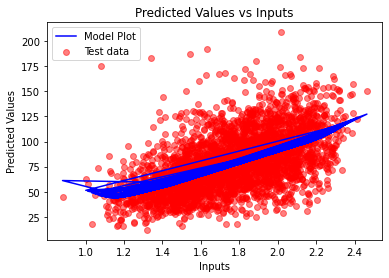

In [ ]:
plt.scatter(sc_X.inverse_transform(X_test_SVR), sc_y.inverse_transform(y_test_SVR), color = 'red', 
           marker = 'o', s = 35, alpha = 0.5, label = 'Test data')
plt.plot(sc_X.inverse_transform(X_test_SVR), sc_y.inverse_transform(regressor_SVR.predict(X_test_SVR)), 
           color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

### E. Deep Neural Network - DNN 

In [ ]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=12, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation="linear"))

model.compile(
    optimizer=Adam(),
    loss='MSE',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

M= model.fit(X_train_MLR, y_train_MLR, batch_size=12, epochs = 100, verbose=1, validation_data=(X_test_MLR, y_test_MLR))


Epoch 1/100
212/212 [==============================] - 1s 2ms/step - loss: 5589.5811 - root_mean_squared_error: 74.7635 - val_loss: 2789.7305 - val_root_mean_squared_error: 52.8179
Epoch 2/100
212/212 [==============================] - 0s 1ms/step - loss: 1121.5137 - root_mean_squared_error: 33.4890 - val_loss: 707.7909 - val_root_mean_squared_error: 26.6043
Epoch 3/100
212/212 [==============================] - 0s 1ms/step - loss: 723.6401 - root_mean_squared_error: 26.9006 - val_loss: 705.5264 - val_root_mean_squared_error: 26.5617
Epoch 4/100
212/212 [==============================] - 0s 1ms/step - loss: 717.8106 - root_mean_squared_error: 26.7920 - val_loss: 699.2860 - val_root_mean_squared_error: 26.4440
Epoch 5/100
212/212 [==============================] - 0s 1ms/step - loss: 714.3696 - root_mean_squared_error: 26.7277 - val_loss: 691.3337 - val_root_mean_squared_error: 26.2932
Epoch 6/100
212/212 [==============================] - 0s 1ms/step - loss: 709.0584 - root_mean_square

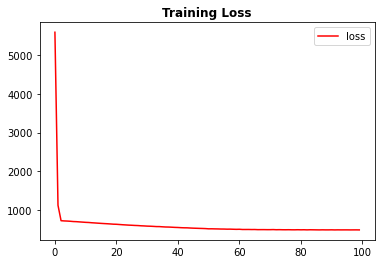

In [ ]:
plt.plot(M.history['loss'], label='loss',color='red')
plt.title(label='Training Loss', weight ='bold')
plt.legend();

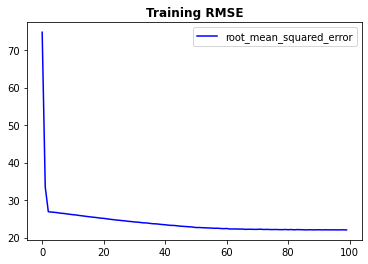

In [ ]:
plt.plot(M.history['root_mean_squared_error'], label='root_mean_squared_error',color='blue')
plt.title(label='Training RMSE', weight ='bold')
plt.legend();

In [ ]:
yhat_DNN=model.predict(X_test_MLR, steps=1)
r2_score(y_test_MLR, yhat_DNN)
print('The R-square is: = ', r2_score(y_test_MLR, yhat_DNN))

The R-square is: =  0.4131175184562217


In [ ]:
mse_DNN = mean_squared_error(y_test_MLR,yhat_DNN,squared=False)
print('The Mean squared error of the tch_bloco variable is: ', mse_DNN)

The Mean squared error of the tch_bloco variable is:  21.856184113416056


## 3. Models summary

### In this section it´s presented the overall performance of each developed model and how they compare against each other

In [ ]:
accuracy_score_model_R2 = {
    'Simple Linear Regression':0.30517070032433957,
    'Multivariate Linear Regression':0.41092738260302897,
    'Polynomial Regression (5th order)':0.29827477315472894,
    'SVR':0.2930000273198822,
    'DNN':0.4131175184562217
}

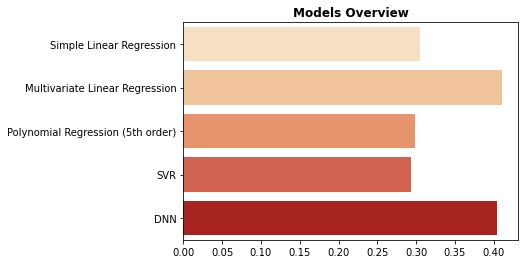

In [ ]:
def models_overview(accuracy_score_model_R2):
    
    model_accuracy = list(accuracy_score_model_R2.values())
    model_name = list(accuracy_score_model_R2.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview', weight='bold');
    return g
    
over_view = models_overview(accuracy_score_model_R2)

In [ ]:
accuracy_score_model_MSE = {
    'Simple Linear Regression':23.7814225321218,
    'Multivariate Linear Regression':21.8969277362522,
    'Polynomial Regression (5th order)':583.6294896881841,
    'SVR':0.8408329041373903,
    'DNN':21.856184113416056
}

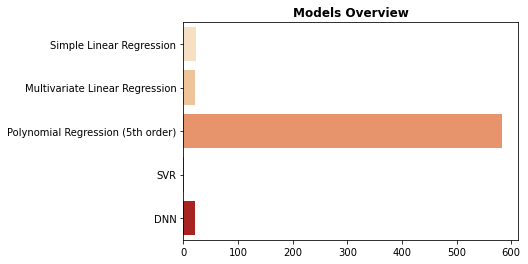

In [ ]:
def models_overview(accuracy_score_model_MSE):
    
    model_accuracy = list(accuracy_score_model_MSE.values())
    model_name = list(accuracy_score_model_MSE.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview', weight='bold');
    return g
    
over_view = models_overview(accuracy_score_model_MSE)

## 4. Conclusions

### Based on the performance results, two models can be considered the best alternatives to make 'tch_bloco' label predictions: the Multivariate Linear Regression model (MLR) and the Deep Neural Network.

### Considering the chosen accuracy metrics (R squared and MSE), both models performed better than other models, displaying the second lowest MSE values (21.89) and the R2 value that is closest to 1 (0.41)

### However, the DNN takes much more time to run since it uses a series of hidden layers to perform its computation, at the same time that it outputs performance metrics that are are very similar to the MLR model metrics.

### Therefore, we conclude that the MLR model is the most suitable to predict the tch variable, using all the data from NDVI features (12 variables in total).